In [3]:
%matplotlib inline

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

# Linear and Logistic Regression

In [9]:
dataset = fetch_california_housing()

In [12]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [15]:
dataset.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [13]:
df = fetch_california_housing(as_frame = True)

In [16]:
house_prices = df.frame

In [17]:
house_prices

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


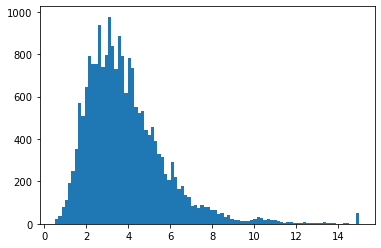

In [19]:
plt.hist(house_prices.MedInc, bins = "fd")
plt.show()

In [21]:
house_prices[house_prices.MedInc > 14].sort_values("MedInc")

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
5304,14.2867,49.0,7.603774,0.946541,850.0,2.672956,34.07,-118.46,5.00001
15698,14.2959,52.0,8.172727,0.872727,304.0,2.763636,37.79,-122.46,5.00001
9811,14.4113,28.0,11.634686,1.509225,569.0,2.099631,36.57,-121.94,5.00001
16915,14.4219,52.0,8.253731,0.950249,519.0,2.582090,37.56,-122.35,5.00001
9370,14.5833,24.0,5.613333,0.853333,163.0,2.173333,37.92,-122.52,5.00001
10483,14.9009,8.0,9.860169,1.114407,899.0,3.809322,33.59,-117.68,5.00001
18052,15.0000,19.0,7.626263,0.939394,267.0,2.696970,37.25,-121.98,5.00001
5260,15.0000,39.0,9.293750,1.018750,414.0,2.587500,34.05,-118.50,5.00001
8853,15.0001,52.0,9.867036,1.091413,1163.0,3.221607,34.07,-118.41,5.00001
8854,15.0001,52.0,8.710145,1.028986,408.0,2.956522,34.07,-118.41,5.00001


Имаме ли повторения?

In [22]:
house_prices.drop_duplicates().shape

(20640, 9)

Не, спрямо всичките данни нямаме повторения.